In [18]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [19]:
data = load_breast_cancer()

In [20]:
print("Data type:", type(data))
print("Data Keys:", data.keys())
print("Data Shape:", data.data.shape)

Data type: <class 'sklearn.utils.Bunch'>
Data Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Data Shape: (569, 30)


In [21]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [22]:
print("Target names: ", data.target_names)
print("Target shape", data.target.shape)

Target names:  ['malignant' 'benign']
Target shape (569,)


In [23]:
# Determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [25]:
# Split the data int train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [26]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Build  de model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [28]:
model.compile(
    optimizer="adam", 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

In [29]:
# Train de model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 31ms/step - loss: 0.5081 - accuracy: 0.7534 - val_loss: 0.4063 - val_accuracy: 0.8511
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 0.4903 - accuracy: 0.7927 - val_loss: 0.3740 - val_accuracy: 0.8564
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 0.4346 - accuracy: 0.8208 - val_loss: 0.3460 - val_accuracy: 0.8830
Epoch 4/100
12/12 [==============================] - 0s 18ms/step - loss: 0.4020 - accuracy: 0.8547 - val_loss: 0.3226 - val_accuracy: 0.8883
Epoch 5/100
12/12 [==============================] - 0s 16ms/step - loss: 0.3893 - accuracy: 0.8507 - val_loss: 0.3022 - val_accuracy: 0.9096
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.3457 - accuracy: 0.8924 - val_loss: 0.2847 - val_accuracy: 0.9096
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.3041 - accuracy: 0.9051 - val_loss: 0.2693 - val_accuracy: 0.9202
Epoch 8/

12/12 [==============================] - 0s 11ms/step - loss: 0.1047 - accuracy: 0.9691 - val_loss: 0.1190 - val_accuracy: 0.9574
Epoch 59/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1029 - accuracy: 0.9712 - val_loss: 0.1186 - val_accuracy: 0.9574
Epoch 60/100
12/12 [==============================] - 0s 15ms/step - loss: 0.0956 - accuracy: 0.9677 - val_loss: 0.1181 - val_accuracy: 0.9574
Epoch 61/100
12/12 [==============================] - 0s 12ms/step - loss: 0.1065 - accuracy: 0.9662 - val_loss: 0.1177 - val_accuracy: 0.9574
Epoch 62/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0923 - accuracy: 0.9692 - val_loss: 0.1173 - val_accuracy: 0.9574
Epoch 63/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1138 - accuracy: 0.9508 - val_loss: 0.1169 - val_accuracy: 0.9574
Epoch 64/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0914 - accuracy: 0.9794 - val_loss: 0.1165 - val_accuracy: 0.9574
Epoch 65/100
12

In [30]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.9790
Train score: [0.0703975185751915, 0.9790025949478149]
6/6 [==============================] - 0s 3ms/step - loss: 0.1077 - accuracy: 0.9628
Test score: [0.10766199976205826, 0.9627659320831299]


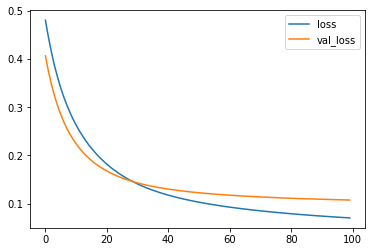

In [31]:
# Plot what's returned by model.fit
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

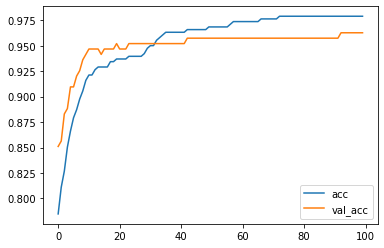

In [33]:
# Plot the accuracy too
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()